# 0. 라이브러리 임포트

In [46]:
#%pip install selenium
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import numpy
import warnings
import re
import requests
import urllib
import time
import selenium
from selenium.webdriver.common.by import By
from selenium import webdriver
import urllib
from urllib.request import urlopen 

#options = webdriver.ChromeOptions()
#options.add_argument('headless') # 옵션 적용 시 에러 발생
driver = webdriver.Chrome()
warnings.filterwarnings(action='ignore')

# 시각화 라이브러리
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from collections import Counter
import  numpy as np
from PIL import Image


# 폰트 설정
font_path = r'C:\\windows\\fonts\\nanumgothicbold.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font)


# 1. 크롤링
개요, 연혁, 교육이념, 교육목표, 전공소개, 학과 안내, 강의교과목

## 1-1. 중앙대학교

In [6]:
# 세부 페이지 접속 함수
def go_to(dept1_idx, dept2_idx):
    driver = webdriver.Chrome()
    driver.get("https://lis.cau.ac.kr/")
    time.sleep(1)
    driver.find_element('xpath','//*[@id="gnavigation"]').click()
    driver.find_element('xpath','//*[@id="gnavigation"]/ul/li[1]/a').click()
    driver.find_element('xpath','//*[@id="gnavigation"]/ul/li[1]/div/div/ul/li[%s]/a[%s]'%(dept1_idx, dept2_idx)).click()
    return driver

In [7]:
# 크롤링
cau = ' '

# 개요 / 연혁
driver = go_to(1,1)
cont1 = driver.find_element('xpath','//*[@id="contents"]/dl[1]/dd[4]').text
cont2 = driver.find_element('xpath','//*[@id="contents"]/dl[1]/dd[6]').text
cau = cau + cont1+cont2
driver.close()

# 교육 이념
driver = go_to(1,2)
cont3 = driver.find_element('xpath', '//*[@id="contents"]/dl[1]/dd[3]/span').text
cont4 = driver.find_element('xpath','//*[@id="contents"]/dl[1]/dd[6]/span').text
cont5 = driver.find_element('xpath','//*[@id="contents"]/dl[1]/dd[8]/span').text
cont6 = driver.find_element('xpath','//*[@id="contents"]/dl[1]/dd[10]/span').text
cont7 = driver.find_element('xpath','//*[@id="contents"]/dl[1]/dd[12]').text
cont8 = driver.find_element('xpath','//*[@id="contents"]/dl[1]/dd[14]/span').text
cau = cont3+cont4+cont5+cont6+cont7+cont8+cau
driver.close()

# 교과 과정
temp_li=[]
driver = go_to(3,3)

td = driver.find_elements('xpath','//*[@id="contents"]/dl[1]/table[1]/tbody')
td = td[0].text.split('\n')
temp_li += td
for x in range(1,5,1):
    text= driver.find_element('xpath','//*[@id="contents"]/dl[1]/div[%s]'%str(x)).text
    temp_li.append(text)
for x in temp_li:
    cau += x
driver.close()

## 1-2. 연세대학교

In [8]:
# 옵션
options = webdriver.ChromeOptions()
options.add_argument('headless') # 옵션 적용 시 에러 발생

# 세부 페이지 접속 함수
def go_to_y(dept1_idx, dept2_idx):
    driver = webdriver.Chrome(options = options)
    driver.get("https://yslis.yonsei.ac.kr/doai/index.do")
    time.sleep(1)
    
    # 마우스 오버 
    action_dir = driver.find_element('xpath','//*[@id="item_body"]/header/div[2]/div/div/ul/li[%s]/a'%dept1_idx)
    act = webdriver.ActionChains(driver)
    act.move_to_element(action_dir).perform() # 마우스 오버 시켜야 상세 메뉴 나타남
    act.perform()

    # 요소 찾기
    driver.find_element('xpath','//*[@id="item_body"]/header/div[2]/div/div/ul/li[%s]/ul/li[%s]/a'%(dept1_idx, dept2_idx)).click()
    return driver

In [9]:
# 크롤링
yon = ''

# 학과 소개
driver  = go_to_y(1,1)
t = driver.find_element('xpath','//*[@id="jwxe_main_content"]/div').text
yon += t
driver.close()

# 학과 연혁
driver = go_to_y(1,2)
t = driver.find_element('xpath','//*[@id="his2000"]').text
yon += t
driver.find_element('xpath','//*[@id="jwxe_main_content"]/div/div/div[1]/ul/li[2]/a').click()
t2 = driver.find_element('xpath','//*[@id="his1990"]').text
yon += t2
driver.close()

# 교과 과정
driver = go_to_y(3,1)
t = driver.find_element('xpath','//*[@id="jwxe_main_content"]').text
re_comp  = re.compile('[A-Z]{3}[0-9]{4}') # 과목코드 제거
skk = re_comp.sub('',yon)
yon += t
driver.close()


## 1-3. 성균관대학교

In [12]:
# 세부 페이지 접속 함수
def go_to_s(dept1_idx, dept2_idx):
    driver = webdriver.Chrome()  # 창 제거 옵션 선택 시 에러 발생
    driver.get("https://lis.skku.edu/lis/index.do")
    driver.maximize_window() # 창을 최대화 했을 때 메뉴의 태그가 달라짐
    time.sleep(1)
    
    # 마우스 오버 
    action_dir = driver.find_element('xpath','//*[@id="item_body"]/header/div[2]/div[2]/div/div[2]/div/ul/li[%s]/a'%dept1_idx)
    act = webdriver.ActionChains(driver)
    act.move_to_element(action_dir).perform() # 마우스 오버 시켜야 상세 메뉴 나타남
    act.perform()

    # 요소 찾기
    driver.find_element('xpath','//*[@id="item_body"]/header/div[2]/div[2]/div/div[2]/div/ul/li[%s]/ul/li[%s]/a'%(dept1_idx, dept2_idx)).click()
    return driver


In [13]:
# 크롤링
skk = ' '

# 인사말  - 준비중

# 학과 연혁
driver = go_to_s(1,2)
t = driver.find_element('xpath', '//*[@id="jwxe_main_content"]').text
skk += t
driver.close()

# 교육 목표 및 학과 안내
driver = go_to_s(1,3)
t = driver.find_element('xpath','//*[@id="jwxe_main_content"]').text
skk += t
driver.close()

# 교육과정
driver = go_to_s(2,1)
for i in range(2,5,1):
    t = driver.find_element('xpath','//*[@id="jwxe_main_content"]/div[1]/div/table/tbody').text
    skk += t
    driver.find_element('xpath','//*[@id="jwxe_main_content"]/div[2]/ul/li[%s]'%i).click()

# 과목코드, 개설여부 -> 전처리 단계에서 다른 학교들과 한번에 처리하려면 복잡해짐 -> 미리 전처리
skk = skk.replace('Yes','')
skk = skk.replace('No','')
re_comp  = re.compile('[A-Z]{3}[0-9]{3}') # 과목코드 제거
skk = re_comp.sub('',skk)
skk = re.sub('[0-9]*[0-9]','',skk) # 이수 학기 제거
skk = re.sub("[0-9]*' '*[0-9]",'',skk) # 학점 제거
driver.close()

# 과정소개  - 준비중


In [14]:
# 중앙대
cau

"4차 산업혁명의 도래가 이루어지고 있는 현재의 급변하는 정보환경에서, 정보는 개인에서부터 조직이나 국가에 이르기까지 그 중요성이 점차 증대되고 있다. 과학기술의 발달과 학문의 세분화로 인하여 대량의 정보가 생산될 수밖에 없는 현대사회의 속성을 우리는 정보폭발 또는 정보의 홍수라는 현상으로 설명하고 있다.\n\n이러한 사회적 현상은 학문의 영역에도 큰 변화를 가져오게 되었다. 지식정보사회에 적극 대응하기 위해 컴퓨터 관련 분야의 급성장이 이루어졌고, 정보에 대한 새로운 해석 및 가치 부여를 시도하고 있는 문헌정보학을 현재의 정보 중심 사회에서의 대표적인 학문 분야라고 할 수 있다. 특히 문헌정보학은 기하급수적으로 증가하고 있는 각종 정보 및 정보자원에 대하여 가장 신속하고 정확하게 최적의 정보를 이용자에게 제공할 수 있도록 그 처리 방법을 개발하는 것을 궁극적인 목표로 삼고 있다.\n\n이와 같은 요구에 부응하여 도서관학에서 문헌정보학(library and information science)으로 진화한 문헌정보학은 전통적인 도서관학(library science)의 연구방법론과는 달리, 정보의 발생, 성질, 행태 및 유통 현상에 관한 일반적인 원리를 추구하는 순수과학적인 측면, 효과적이고 효율적인 정보유통 시스템의 설계와 운용에 관련된 응용과학적인 측면을 공히 포함하고 있는 포괄적이고 학제적인 학문이라 할 수 있다.\n\n중앙대학교 문헌정보학과에서는 이러한 정보환경의 변화에 발맞추어 과거와 현재를 잇는 문헌정보학의 역사, 이론 연구 및 다양한 실무 경험 등을 제공함과 동시에 수많은 정보 관련 분야에 대한 폭넓은 이해를 바탕으로 정보처리, 정보조직, 데이터 분석 등 다양한 정보처리 분야에 대한 포괄적인 지식을 갖춘 정보전문가를 양성하고 있다.중앙대학교는 의와 참의 정신을 바탕으로 사회지도자로서 갖추어야 할 교양과 국가사회의 발전에 기여할 수 있는 전문적 지식을 기르고, 민족과 인류공영에 기여할 수 있는 열린 세계관을 지닌 인재 양성을 교육목적으로 한다.사회과학대

In [15]:
# 연세대
yon

'문헌정보학과\n문헌정보학은 인간의 지적 활동에 필요한 정보의 수집, 축적, 검색 및 이들의 효과적인 전달을 위한 지식커뮤니케이션 현상에 학문적 기초를 두고 있다. 또한 문헌정보학은 정보의 속성과 행태, 정보의 흐름을 지배하는 요인 등 정보커뮤니케이션 현상을 학문의 연구대상으로 삼아 왔으며 필요한 정보에 대한 효율적인 접근과 이용을 성취할 수 있는 과학적인 방법을 개발해 왔다. 특히 컴퓨터와 통신기술 및 뉴미디어를 포함한 정보기술의 발달로 정보의 수집, 조직, 축적, 검색, 이용, 전송과 관련된 연구 및 기술적 발전도 끊임없이 이룩하여 왔다.\n  정보화시대를 맞이하여 각종 정보와 문헌이 폭증하고 있으며, 개방의 폭이 확대되고 무한 경쟁시대를 맞이하면서 개인간ㆍ단체간ㆍ국가간의 정보 주도권 경쟁이 치열하게 전개되고 있다. 정보화시대에 정보를 가장 효율적으로 활용할 수 있는 정보전문인력을 육성하는 것은 중요한 과제라 할 수 있다. 이러한 시점에서 문헌정보학의 역할과 그 책임은 더욱 무거워지고 있다. 정보화시대에서 정보가 새로운 자원이라고 한다면 정보를 대상으로 하는 문헌정보학은 바로 이 시대의 핵심영역이며 이를 통해 배출되고 있는 정보전문직은 사회 전반의 주도적인 역할을 담당하게 될 것이다.\n    문헌정보학은 정보현상의 이해 및 정보문제의 해결을 그 목적으로 하고 있다. 정보현상을 이해하기 위해서 인간, 정보자원 및 정보기술이라는 세 가지 요소의 융합적인 상호작용을 통하여 나타나는 지식 및 정보 커뮤니케이션 현상을 다양한 관점에서 고찰하며, 정보문제의 해결을 위해서 각 요소 및 그 융합시스템의 가치와 역할, 그리고 가능성을 기반으로 한 응용을 개발하는 데에 주안점을 둔다. 지식정보시대를 맞이하여 폭증하는 다양한 지식정보자원을 효과적이고 효율적으로 활용하여 새로운 가치를 창출할 수 있는 능력이 개인은 물론 조직 및 국가에서 매우 중요한 경쟁력이 되었다. 우리 학과는 이러한 혁신 창출의 토대가 되는 효과적이고 효율적인 지식 및 정보시스템과 관련한 다양한 이론과 과

In [16]:
# 성균관대
skk

'   년\n월\n주영준 교수 부임\n년\n월\n글로벌 Data Science 프로그램 연수\n월\n연계전공 데이터사이언스학과 개설\n년\n월\n글로벌 Informatics 프로그램 연수 (미국 동부, Princeton Public Library Science, Industry and Business Library (SIBL), Cornell University Library)\n월\n글로벌 Informatics 프로그램 연수 (University of Washington, Microsoft, Tableau Software)\n월\n이용정 교수 부임\n월\n교환장학생 선발 및 파견(University of rth Carolina, Syracuse University)\n월\n수도권 특성화 사업 선정 (iSchool 기반의 세계최고수준 데이타 전문가 양성 사업단)\n월\n학과창설 주년 기념행사(국제학술세미나&기념식, 주년기념관)\n월\n아시아 태평양 iConference 개최 & iSchool 대표자 회의\n년\n월\n글로벌 인문학 프로그램 연수 시작 (University of Washington, Library of Congress, Rutgers School of Information and Communication, New York Public Library, Syracuse School of Information Studies)\n년\n월\n‘석천 권기원 교수 정년 기념 논총’ 헌정\n월\n권기원 교수 퇴임, 본교 명예교수로 추대됨\n년\n월\n심원식 교수 부임\n년\n월\n학과창설 주년 기념행사(국제학술세미나&기념식, 주년기념관)\n년\n월\n오삼균 교수 부임\n년\n월\n최성진 교수 퇴임, 본교 명예교수로 추대됨\n년\n월\n신승운 교수 부임\n년\n월\n이은철 교수 부임\n년\n월\n정원 명으로 감축\n월\n창사 이춘희 교수 정년 퇴임, 본교 명예교수로 추대됨\n월\n‘창사 이춘회 교수 정년 기념 논총’ 헌정\n년\n월\n고영만 교수 부임\n년\n월

# 2. 텍스트 전처리

In [34]:
#%pip install konlpy
from konlpy import *
from konlpy.tag import *
#mecab = Mecab('C:\\mecab\\mecab-ko-dic')
okt = Okt()
kkm = Kkma()
kom = Komoran()
han = Hannanum()

In [39]:
test_t = '문헌정보학은 인간의 지적 활동에 필요한 정보의 수집, 축적, 검색 및 이들의 효과적인 전달을 위한 지식커뮤니케이션 현상에 학문적 기초를 두고 있다. 또한 문헌정보학은 정보의 속성과 행태, 정보의 흐름을 지배하는 요인 등 정보커뮤니케이션 현상을 학문의 연구대상으로 삼아 왔으며 필요한 정보에 대한 효율적인 접근과 이용을 성취할 수 있는 과학적인 방법을 개발해 왔다. 특히 컴퓨터와 통신기술 및 뉴미디어를 포함한 정보기술의 발달로 정보의 수집, 조직, 축적, 검색, 이용, 전송과 관련된 연구 및 기술적 발전도 끊임없이 이룩하여 왔다.'
print('코모란')
print( kom.pos(test_t,flatten=False, join=True)) #komoran
print('\n')
print('꼬꼬마')
print(kkm.pos(test_t,flatten=False, join=True)) #kkma
print('\n')
print('한나눔')
print(han.pos(test_t,flatten=False, join=True)) # hannanum
print('\n')
print('OKT')
print(okt.pos(test_t,norm=True, stem=True, join=True)) #okt

코모란
[['문헌정보학/NNP', '은/JX', '인간/NNG', '의/JKG', '지적/NNG', '활동/NNG', '에/JKB', '필요/NNG', '하/XSV', 'ㄴ/ETM', '정보/NNG', '의/JKG', '수집/NNP', ',/SP', '축적/NNG', ',/SP', '검색/NNP', '및/MAJ', '이/NP', '들/XSN', '의/JKG', '효과/NNG', '적/XSN', '이/VCP', 'ㄴ/ETM', '전달/NNG', '을/JKO', '위하/VV', 'ㄴ/ETM', '지식/NNG', '커뮤니케이션/NNG', '현상/NNG', '에/JKB', '학문/NNG', '적/XSN', '기초/NNG', '를/JKO', '두/VV', '고/EC', '있/VX', '다/EF', './SF', '또한/MAJ', '문헌정보학/NNP', '은/JX', '정보/NNG', '의/JKG', '속성/NNP', '과/JC', '행태/NNG', ',/SP', '정보/NNG', '의/JKG', '흐름/NNG', '을/JKO', '지배/NNG', '하/XSV', '는/ETM', '요인/NNG', '등/NNB', '정보/NNG', '커뮤니케이션/NNG', '현상/NNG', '을/JKO', '학문/NNG', '의/JKG', '연구/NNG', '대상/NNG', '으로/JKB', '삼/VV', '아/EC', '오/VX', '았/EP', '으며/EC', '필요/NNG', '하/XSV', 'ㄴ/ETM', '정보/NNG', '에/JKB', '대하/VV', 'ㄴ/ETM', '효율/NNG', '적/XSN', '이/VCP', 'ㄴ/ETM', '접근/NNG', '과/JC', '이용/NNG', '을/JKO', '성취/NNG', '하/XSV', 'ㄹ/ETM', '수/NNB', '있/VV', '는/ETM', '과학/NNG', '적/XSN', '이/VCP', 'ㄴ/ETM', '방법/NNG', '을/JKO', '개발/NNG', '하/XSV', '아/EC', '오/VX', '았/EP', '다/EF'

- komoran : '이룩하다' -> '이룩(xr)'+'하'+'다'-> '이룩'을 어근으로 봄
- okt : '이(noun)' +'룩(suffix)' +'하'+'다' -> 완전히 잘못 토큰화함.
- kkoma: '이룩'(nng) + '하' + '아' +'오' +'았' +'다'
    * 꼬꼬마의 경우, 문헌정보학을 '문헌' +'정보학' 으로 토큰화함.
    * '발전도'(발전(명사)+도(조사)) 를 명사로 태깅함
- hannanum : '이룩'(nng) + '하' + '여'
    * 한나눔 역시 문헌정보학을 '문헌' + '정보학'으로 토큰화

--> 따라서, komoran이 가장 적절한 토큰화 성능을 보이는 것으로 판단

## 2-0. 특수기호 제거

In [21]:
cau = re.sub('[(-:*→•)]',' ',cau)
skk = re.sub('[(-:*→•\n)]',' ',skk)
yon = re.sub('[(-:*→•▹ㆍ\n)]',' ',yon)

## 2-1. 토큰화 (명사 추출)

In [41]:
cau_n = kom.nouns(cau)
skk_n = kom.nouns(skk)
yon_n = kom.nouns(yon)

## 2-2. 불용어 제거

### 2-2-1. 단어 빈도 확인 및 불용어 리스트 생성

In [52]:
cau_df = pd.DataFrame(columns = ['형태소','빈도'])
skk_df = pd.DataFrame(columns = ['형태소','빈도'])
yon_df = pd.DataFrame(columns = ['형태소','빈도'])

cau_n_cnt = Counter(cau_n)
cau_df['형태소']  = cau_n_cnt.keys()
cau_df['빈도']  = cau_n_cnt.values()
cau_df = cau_df.sort_values('빈도', ascending = False)

skk_n_cnt = Counter(skk_n)
skk_df['형태소']  = skk_n_cnt.keys()
skk_df['빈도']  = skk_n_cnt.values()
skk_df =skk_df.sort_values('빈도', ascending = False)

yon_n_cnt = Counter(yon_n)
yon_df['형태소']  = yon_n_cnt.keys()
yon_df['빈도']  = yon_n_cnt.values()
yon_df = yon_df.sort_values('빈도', ascending = False)


In [58]:
def vis_cnt(df, title):
    plt.figure(figsize = (20,4))
    plt.plot(df['형태소'],df['빈도'])
    plt.xticks(rotation = 90)
    plt.title(title)

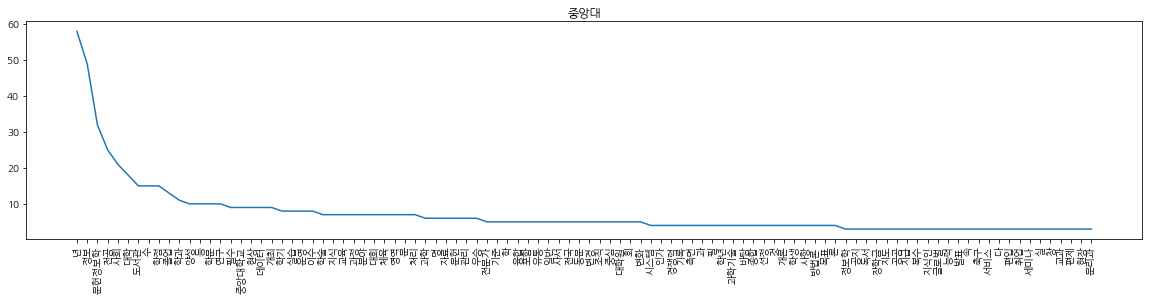

In [59]:
vis_cnt(cau_df[:100],'중앙대')

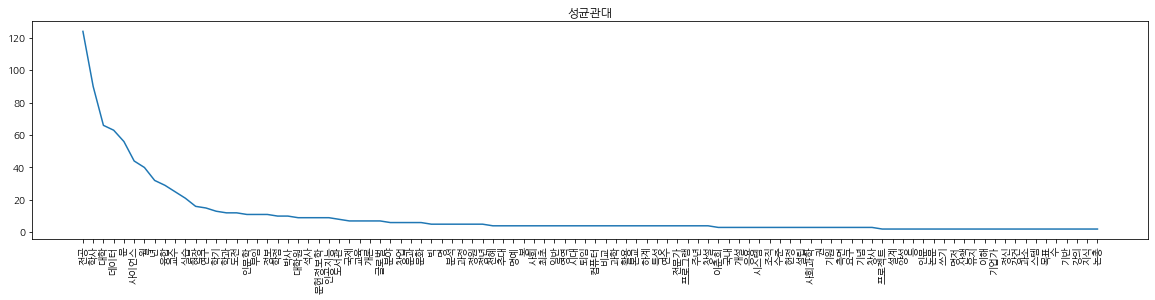

In [61]:
vis_cnt(skk_df[:100],'성균관대')

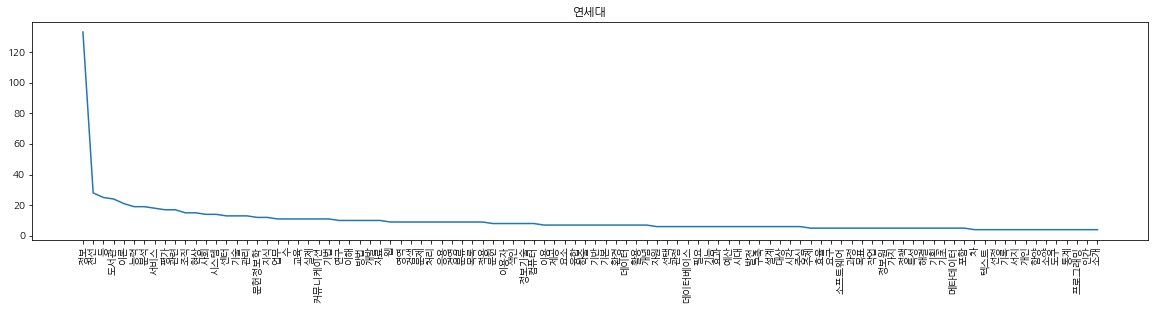

In [62]:
vis_cnt(yon_df[:100],'연세대')

### 2-2-2. 불용어 제거
- 한 글자 단어 위주로 제거 ('웹' 은 예외로 함)
- 문헌정보학, 문헌정보, 문헌정보학과 삭제

In [63]:
cau_dict = {}
skk_dict = {}
yon_dict = {}

def filter_word(dict, df):
    for i in range(len(df)):
        if (len(df['형태소'][i]) > 1 and df['형태소'][i] not in ['문헌정보학','문헌정보','문헌정보학과'])  or df['형태소'][i]  == '웹':
            dict[df['형태소'][i]] =df['빈도'][i]
    return dict 

In [66]:
cau_dict = filter_word(cau_dict,cau_df)
skk_dict = filter_word(skk_dict, skk_df)
yon_dict = filter_word(yon_dict, yon_df)

# 3. 워드클라우드

In [70]:
import wordcloud

In [109]:
import wordcloud
from wordcloud import WordCloud

# 대학별 색상 color function
def cau_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(218,80%%, %d%%)" % np.random.randint(29,56))   

def skk_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(108,71%%, %d%%)" % np.random.randint(29,56))

def yon_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(243,88%%, %d%%)" % np.random.randint(29,56))


# 대학별 로고 마스크
c_icon = Image.open('cau_logo.png')    
cau_mask = Image.new("RGB", c_icon.size, (255,255,255))
cau_mask.paste(c_icon,c_icon)
cau_mask = np.array(cau_mask)

s_icon = Image.open('skk_logo.png')    
skk_mask = Image.new("RGB", s_icon.size, (255,255,255))
skk_mask.paste(s_icon,s_icon)
skk_mask = np.array(skk_mask)

y_icon = Image.open('yon_logo.png')    # 마스크가 될 이미지 불러오기 
yon_mask = Image.new("RGB", y_icon.size, (255,255,255))
yon_mask.paste(y_icon,y_icon)
yon_mask = np.array(yon_mask)



def generate_wc(dict, title, color_func, mask):
    wordcloud = WordCloud(
        font_path = font_path,
        width = 800,
        height = 800,
        background_color = "white",
         mask = mask
    )
    wordcloud.generate_from_frequencies(dict)
    array = wordcloud.to_array()
    fig = plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud.recolor(color_func = color_func), interpolation='bilinear')
    plt.box(False)
    plt.axis(False)
    plt.title(title,fontsize = 18)
    plt.show()

ValueError: bad transparency mask

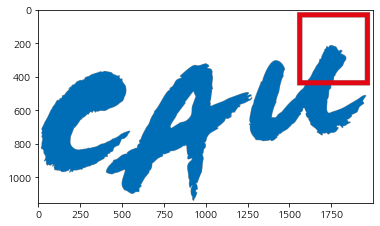

In [87]:
import  numpy as np
from PIL import Image

icon = Image.open('cau_logo.png')    # 마스크가 될 이미지 불러오기 
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

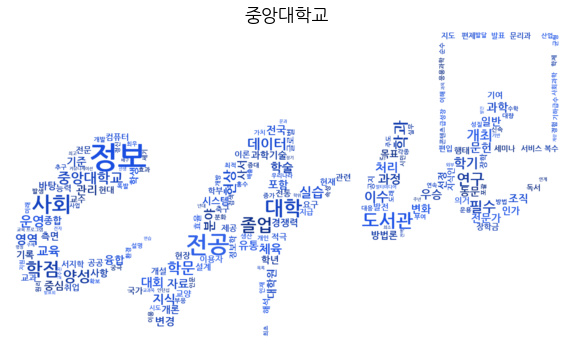

In [103]:
generate_wc(cau_dict,'중앙대학교',cau_color_func)